In [1]:
import timeit
from pathlib import Path

import sys
sys.path.append(str(Path.cwd().parent / "classes"))
sys.path.append(str(Path.cwd().parent))

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sim_config import SimConfiguration
from simulation import Simulation
from msa import Msa


TREES_PATH = Path.cwd() / "TRUE_TREES"


In [57]:
def refresh_sim(tree_file):
    ROOT_SEQUENCE_LENGTH = 1000

    sim_config = SimConfiguration(original_sequence_length=ROOT_SEQUENCE_LENGTH, indel_length_alpha=2.0,
                                indel_truncated_length=50,
                                rate_ins=0.03, rate_del=0.09,
                                deletion_extra_edge_length=50,
                                switch_factor=200,
                                seed=243)
    sim = Simulation(input_tree=str(tree_file), config=sim_config)
    return sim
time_labels = ["tree", "hybrid", "blocktree", "blocklist", "naive"]


In [ ]:

time_winners = []
measured_times: list[list[float]] = []





for tree_path in list(TREES_PATH.iterdir()):#[0.5, 1,2,4,8,16]:

    sim = refresh_sim(tree_path)
    hybrid_time = timeit.timeit(sim.msa_from_hybrid, number=5)
    blocklist_time = timeit.timeit(sim.msa_from_blocklist, number=5)
    blocktree_time = timeit.timeit(sim.msa_from_blocktree, number=5)
    naive_time = timeit.timeit(sim.msa_from_naive, number=5)

    time_measures = [tree_path, hybrid_time, blocktree_time, blocklist_time, naive_time]
    print(time_measures)
    measured_times.append(time_measures)



[PosixPath('/home/elyalab/Dev/failed_syncs/evo-sim/benchmark/TRUE_TREES/MTMR2_true_tree.txt'), 0.16599890399811557, 0.17956838799727848, 0.16550568100137752, 0.9211229889988317]
[PosixPath('/home/elyalab/Dev/failed_syncs/evo-sim/benchmark/TRUE_TREES/MAP2K5_true_tree.txt'), 0.1672486179995758, 0.17715795800177148, 0.16685607500039623, 0.8968221650029591]
[PosixPath('/home/elyalab/Dev/failed_syncs/evo-sim/benchmark/TRUE_TREES/TRIP12_true_tree.txt'), 0.17386599900055444, 0.17723641500197118, 0.16839276600148878, 0.9393300590018043]
[PosixPath('/home/elyalab/Dev/failed_syncs/evo-sim/benchmark/TRUE_TREES/UTP11L_true_tree.txt'), 0.16123320200131275, 0.17219409099925542, 0.16335256200181902, 0.9441894689989567]
[PosixPath('/home/elyalab/Dev/failed_syncs/evo-sim/benchmark/TRUE_TREES/BRPF1_true_tree.txt'), 0.16411859599975287, 0.1758486359976814, 0.16581206800037762, 0.9690088669995021]
[PosixPath('/home/elyalab/Dev/failed_syncs/evo-sim/benchmark/TRUE_TREES/HNRNPLL_true_tree.txt'), 0.1624491800

In [15]:
%%timeit
for tree_path in list(TREES_PATH.iterdir()):#[0.5, 1,2,4,8,16]:
    sim = refresh_sim(tree_path / "raxml.tree")
    sim.msa_from_blocklist()


5.94 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
for tree_path in list(TREES_PATH.iterdir()):#[0.5, 1,2,4,8,16]:
    sim = refresh_sim(tree_path / "raxml.tree")
    sim.msa_from_blocktree()

6.23 s ± 67.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%%timeit
for tree_path in list(TREES_PATH.iterdir()):#[0.5, 1,2,4,8,16]:
    sim = refresh_sim(tree_path / "raxml.tree")
    sim.msa_from_hybrid()

5.84 s ± 82.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
times_df = pd.DataFrame(measured_times, columns=time_labels).reset_index()

# times_df.idxmin(axis=1).value_counts()
times_df.loc[(times_df.blocklist - times_df.hybrid).abs().idxmax()].to_list()

[211,
 PosixPath('/home/elyalab/Dev/failed_syncs/evo-sim/benchmark/TRUE_TREES/DBC1_true_tree.txt'),
 0.19026545400265604,
 0.17645225199885317,
 0.16410575299960328,
 0.8755202620013733]

In [27]:
times_df.to_csv("all_methods_comparison.csv")

In [2]:
times_df = pd.read_csv("all_methods_comparison.csv", index_col=0)
times_df

,index,tree,hybrid,blocktree,blocklist,naive
0,0,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.165999,0.179568,0.165506,0.921123
1,1,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.167249,0.177158,0.166856,0.896822
2,2,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.173866,0.177236,0.168393,0.939330
3,3,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.161233,0.172194,0.163353,0.944189
4,4,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.164119,0.175849,0.165812,0.969009
...,...,...,...,...,...,...
536,536,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.176466,0.183620,0.168265,0.946763
537,537,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.167242,0.188015,0.169083,0.980289
538,538,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.165369,0.173465,0.165600,0.872306
539,539,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.164416,0.180484,0.166387,0.947357


In [3]:
times_df.iloc[:,2:].idxmin(axis=1).value_counts()


hybrid       406
blocklist    134
blocktree      1
Name: count, dtype: int64

In [4]:
times_df

,index,tree,hybrid,blocktree,blocklist,naive
0,0,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.165999,0.179568,0.165506,0.921123
1,1,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.167249,0.177158,0.166856,0.896822
2,2,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.173866,0.177236,0.168393,0.939330
3,3,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.161233,0.172194,0.163353,0.944189
4,4,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.164119,0.175849,0.165812,0.969009
...,...,...,...,...,...,...
536,536,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.176466,0.183620,0.168265,0.946763
537,537,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.167242,0.188015,0.169083,0.980289
538,538,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.165369,0.173465,0.165600,0.872306
539,539,/home/elyalab/Dev/failed_syncs/evo-sim/benchma...,0.164416,0.180484,0.166387,0.947357


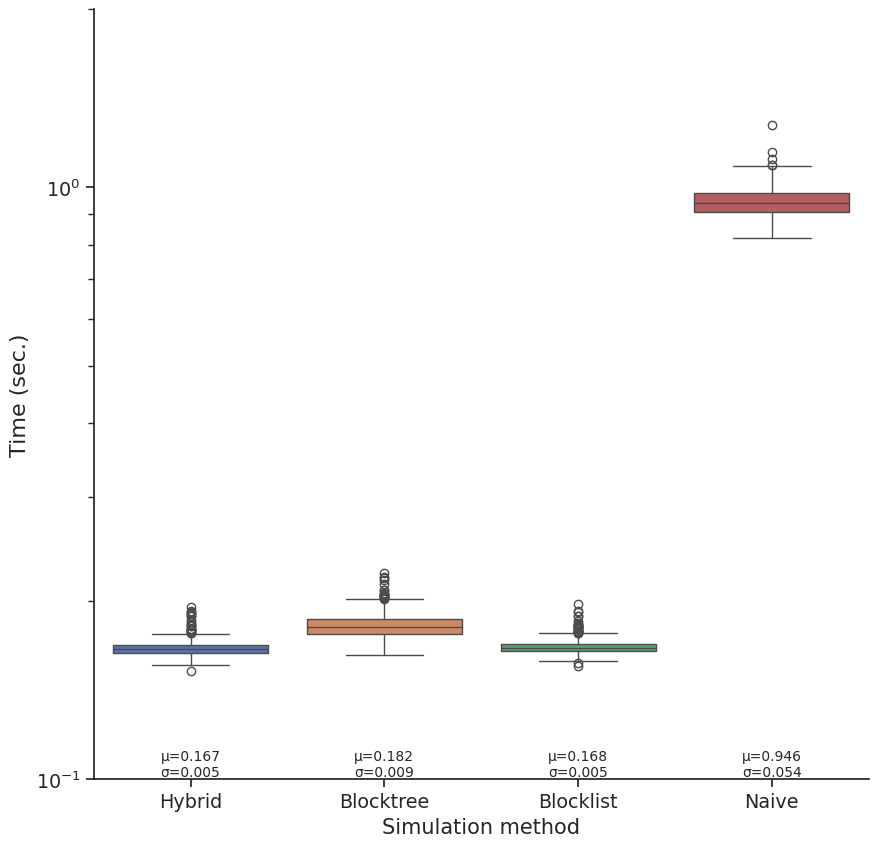

In [83]:

# ax = times_df.plot.scatter(x="index", y=time_labels[1], label=time_labels[1], figsize=(20, 10), s=40)
sns.set_theme(style="ticks", font_scale=1.25)
ax = sns.boxplot(data=times_df.iloc[:,2:])
ax.set_yscale("log")
ax.set_ylim(0.1, 2)
ax.set_ylabel("Time (sec.)", size=16)
ax.set_xlabel("Simulation method")
for idx,label in enumerate(time_labels[1:]):
    mean = times_df[label].mean()
    std = times_df[label].std()
    plt.text(idx, plt.ylim()[0], 
             f'μ={mean:.3f}\nσ={std:.3f}',
             horizontalalignment='center',
             verticalalignment='bottom', size=10)
ax.figure.set_size_inches(10, 10)
sns.despine();

ticks = ax.get_xticks()
ax.set_xticks(ticks)
new_xticklabels = [item.get_text().title() for item in ax.get_xticklabels()]
ax.set_xticklabels(new_xticklabels)

plt.savefig("assets/orthomam_benchmark.svg",bbox_inches="tight")
plt.savefig("assets/orthomam_benchmark.png",bbox_inches="tight", dpi=300)

# times_df.plot.box(x="index", y=time_labels[2], ax=ax, label=time_labe
# ls[2], s=40)
# times_df.plot.box(x="index", y=time_labels[3], ax=ax, label=time_labels[3], s=40)
# times_df.plot.box(x="index", y=time_labels[4], ax=ax, label=time_labels[4], s=40)
# ax.set_yscale("log")
# ax.set_ylabel("Time (sec.)", fontsize=25)
# ax.set_xlabel("")

# ax.legend(fontsize=25)
